In [1]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os
from tensorflow.keras.optimizers import SGD
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
import cv2

In [3]:
size=500
TRAINING_DIR = "/content/drive/Shareddrives/Projet_Calédonie/Base_de_données_finale/Non_Annotated_Data/train"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=10,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')
VALIDATION_DIR = "/content/drive/Shareddrives/Projet_Calédonie/Base_de_données_finale/Non_Annotated_Data/valid"
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(size, size),
                                                       class_mode='categorical',
                                                       batch_size=75,shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(size, size),
    class_mode='categorical',
    batch_size=40,shuffle=True)

Found 2843 images belonging to 2 classes.
Found 1213 images belonging to 2 classes.


In [4]:
input_tensor = Input(shape=(size, size, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


87924736/87910968 [==============================] - 0s 0us/step


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 249, 249, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 249, 249, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
history = model.fit(
train_generator, epochs = 50,validation_data = validation_generator )
model.save("/content/drive/Shareddrives/Projet_Calédonie/Base_de_données_finale/Non_Annotated_Data/InceptionV3_final.h5")

Epoch 1/50
38/38 [==============================] - 1445s 38s/step - loss: 1.6014 - acc: 0.7197 - val_loss: 0.3638 - val_acc: 0.8219
Epoch 2/50
38/38 [==============================] - 303s 8s/step - loss: 0.4157 - acc: 0.8262 - val_loss: 0.2650 - val_acc: 0.8961
Epoch 3/50
38/38 [==============================] - 303s 8s/step - loss: 0.3900 - acc: 0.8470 - val_loss: 0.2707 - val_acc: 0.8978
Epoch 4/50
38/38 [==============================] - 303s 8s/step - loss: 0.3214 - acc: 0.8607 - val_loss: 0.2480 - val_acc: 0.8953
Epoch 5/50
38/38 [==============================] - 296s 8s/step - loss: 0.2927 - acc: 0.8692 - val_loss: 0.2293 - val_acc: 0.9060
Epoch 6/50
38/38 [==============================] - 297s 8s/step - loss: 0.2848 - acc: 0.8695 - val_loss: 0.5151 - val_acc: 0.7535
Epoch 7/50
38/38 [==============================] - 296s 8s/step - loss: 0.2875 - acc: 0.8688 - val_loss: 0.2270 - val_acc: 0.9035
Epoch 8/50
38/38 [==============================] - 296s 8s/step - loss: 0.2465 -

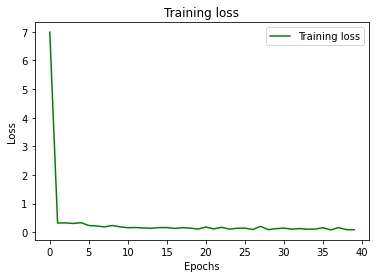

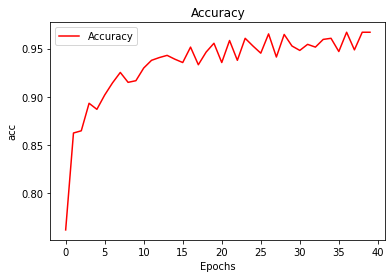

In [ ]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.epoch, history.history["acc"], 'r', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
test_data=validation_generator
train_data=train_generator
predictions=model.predict(train_data)
results=model.evaluate(train_data,batch_size=100)
prediction_labels = list(np.argmax(predictions, axis=-1))
true_labels = train_data.classes
labels = (train_data.class_indices)
print("train loss : ", results[0])
print("train accuracy : ", results[1])
print('')
print("confusion matrix :\n", confusion_matrix(true_labels, prediction_labels))
print('')
print(labels)
print('')
print("classification report :\n", sklearn.metrics.classification_report(true_labels, prediction_labels))
